# Линейная регрессия

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [109]:
dataset = pd.read_csv('datasets/auto_insurance_sweden.csv', names=['X', 'Y'])
data = np.array(dataset.X)
if len(data.shape) == 1:
    data = np.array([[item] for item in data])
target = np.array(dataset.Y)
target = np.array([[item] for item in target])

In [113]:
class Regression:

    def __init__(self, data=None, target=None):
        self._data = data
        self._target = target
    
    @property
    def linear(self):
        return np.linalg.inv(self._data.T @ self._data) @ \
               self._data.T @ self._target

    @property
    def svd(self):
        fft = self._data @ self._data.T
        ftf = self._data.T @ self._data
        v = np.linalg.eig(fft)[1].T
        u = np.linalg.eig(ftf)[1].T
        tmp1 = np.array(filter(lambda x: x != 0, np.linalg.eig(fft)[0]))
        tmp2 = np.array(filter(lambda x: x != 0, np.linalg.eig(ftf)[0]))
        d = np.diag(np.diag(np.intersect1d(tmp1, tmp2)))
        return u @ np.linalg.inv(d) @ v.T @ self._target

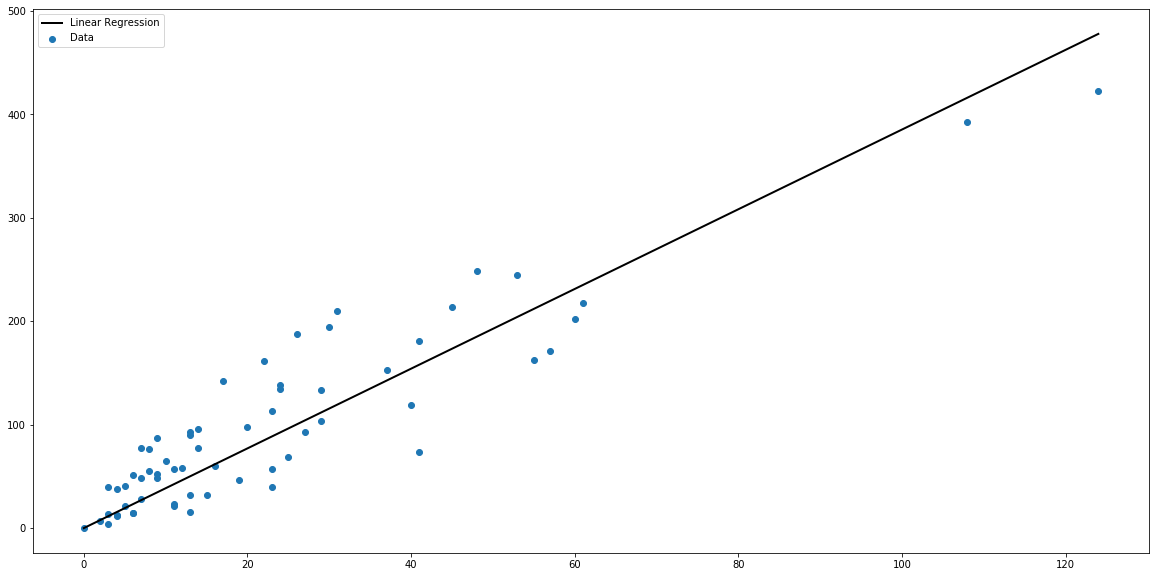

In [118]:
reg = Regression(data, target)
a = 1
b = reg.linear
x = [0, max(data)]
y = [0, b*max(data)+a]

fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(data, target, label='Data')
ax.plot(x, y, color='black', linewidth=2, label='Linear Regression')
ax.legend(loc='upper left')

plt.show()